Ayer subí otro archivo en clase por si no me daba tiempo a hacer algo más hoy. Sí me ha dado tiempo, así que aquí está la nueva versión. Aviso por si acaso he causado alguna confusión.

# Ejercicio 1

Nombre: Jaime. Apellidos: Gabriel Vegas.

## Carga de datos

Carga aquí el conjunto de datos Iris utilizando scikit-learn:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..
# the original dataset would probably call this ['Species']
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Representación de datos y análisis elemental

Representa utilizando matplotlib y/o seaborn las especies (clases) en el conjunto de datos.

¿Está balanceado (aproximadamente misma cantidad de instancias por clase) o desbalanceado?

/home/jaime/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


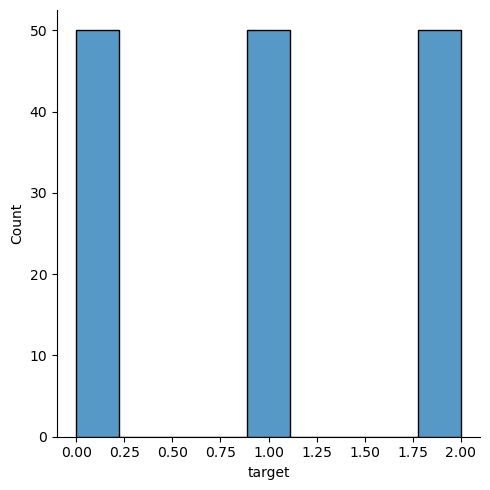

In [2]:
import seaborn as sns

sns.displot(data = data , x='target')

Vemos que tenemos la misma cantidad (50) de todas las clases de plantas

Representa la longitud del pétalo. ¿Cuál es el rango de valores habituales? ¿Cuál la longitud media?

**Orientación:** puedes usar esta función:

https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

In [3]:
import numpy as np

# Longitud media 

media = data['petal length (cm)'].mean()
print(f'Longitud media = {round(media, 2)} cm')

# Desviación típica

sigma = np.std(data['petal length (cm)'])
print(f'El 68% (una desv. estándar asumiendo distrib. normal) de las longitudes de los pétalos están en el rango [{round(media - sigma, 2)}, {round(media + sigma, 2)}]')

# Rango de valores

minimo = data['petal length (cm)'].min()
maximo = data['petal length (cm)'].max()
print(f'Rango de valores: entre {minimo} y {maximo} cm')

Longitud media = 3.76 cm
El 68% (una desv. estándar asumiendo distrib. normal) de las longitudes de los pétalos están en el rango [2.0, 5.52]
Rango de valores: entre 1.0 y 6.9 cm


/home/jaime/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


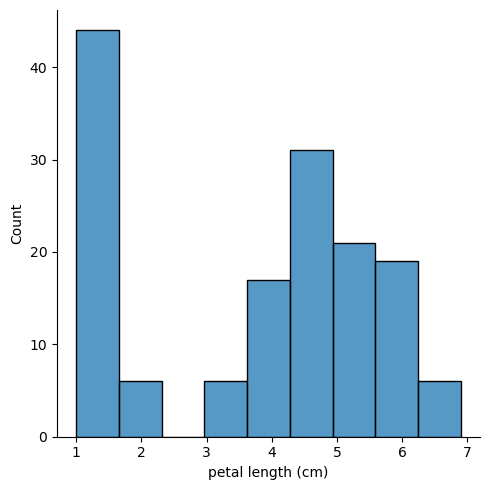

In [4]:
sns.displot(data = data , x='petal length (cm)')

Representa la longitud del pétalo para cada una de las clases. ¿Se podría utilizar para proponer un modelo que separa especies?

/home/jaime/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


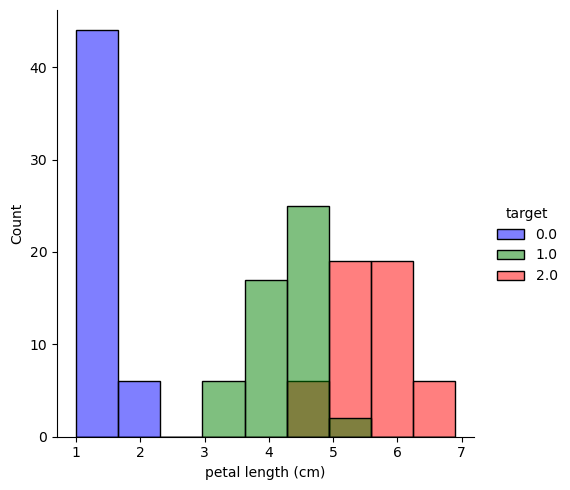

In [5]:
sns.displot(data=data, x='petal length (cm)', hue='target', palette=['blue', 'green', 'red'])

Parece que la longitud del pétalo nos sirve para distinguir en target = 0 y target = 1, 2. No nos da toda la información, pero nos permite reducir el número de grupos donde tenemos que buscar.

Representa simultáneamente el ancho y el largo del pétalo, coloreando de manera diferente cada especie. Puedes usar seaborn para que sea algo más sencillo:

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>

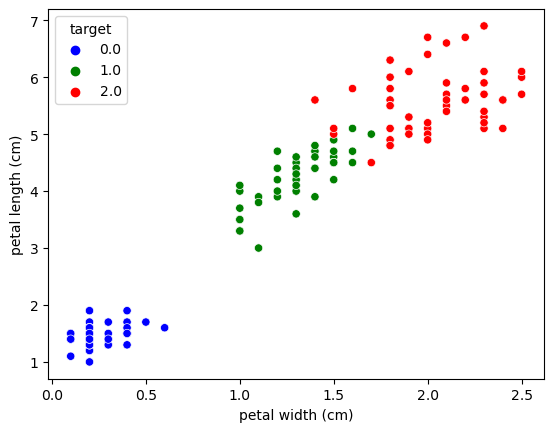

In [6]:
sns.scatterplot(data, x = 'petal width (cm)', y = 'petal length (cm)', hue='target', palette=['blue', 'green', 'red'])

Pasa algo similar que con el gráfico anterior. Podemos distinguir claramente las del grupo 0, pero las del grupo 1 y 2 hay un momento que llegan a mezclase. No obstante, hay regiones que son claramente del grupo 1 o del 2. 

## Modelado sin ML

Usando lo que has aprendido, propón un modelo que clasifique las flores a partir de sus longitudes

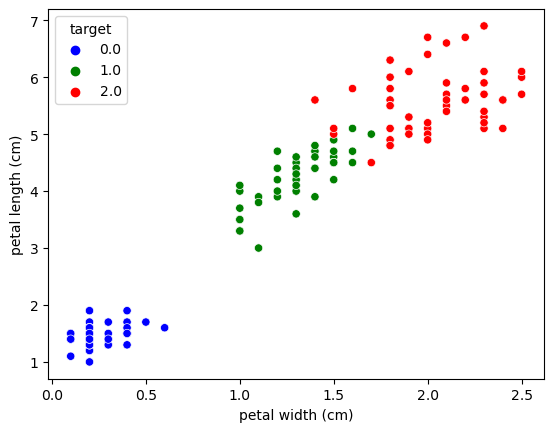

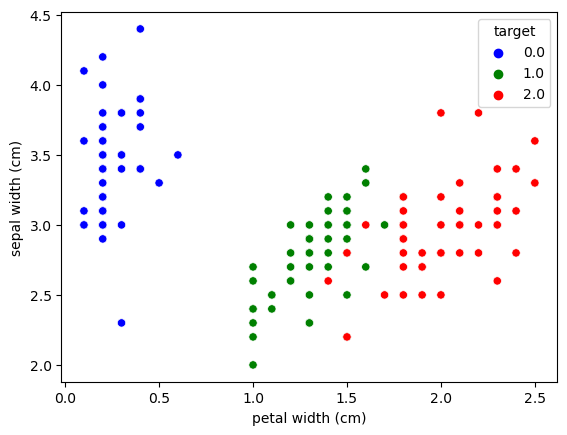

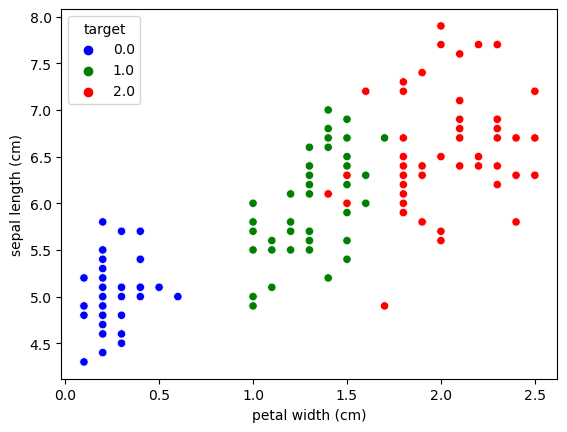

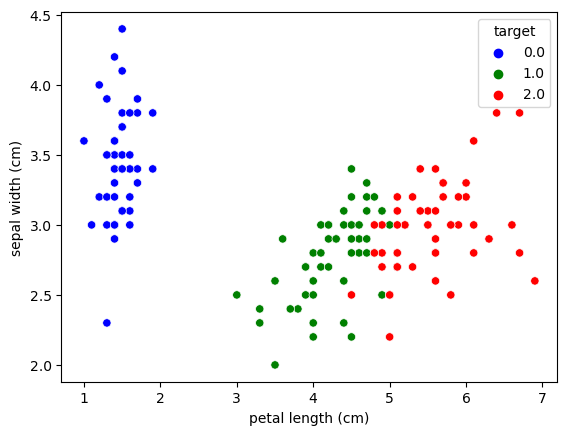

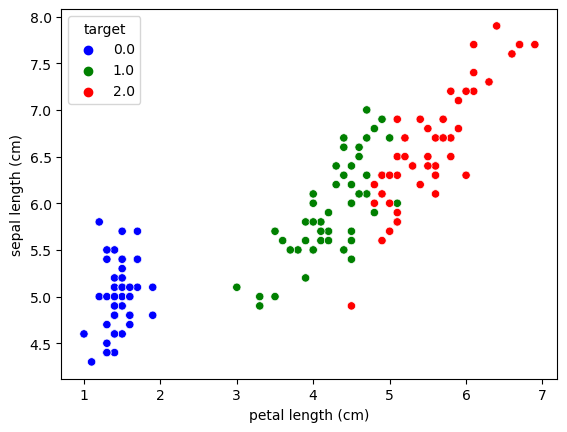

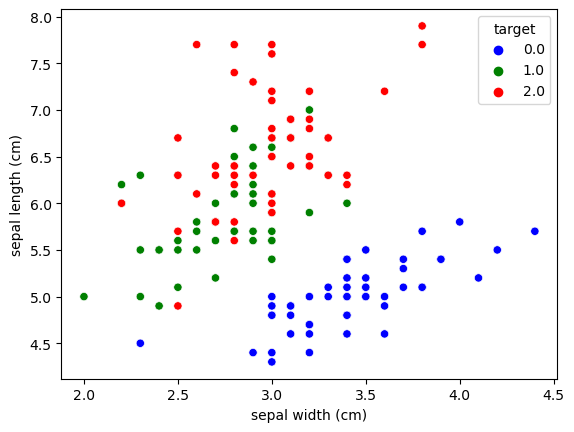

In [7]:
import matplotlib.pyplot as plt

# Miramos si alguna otra relación nos puede ser también útil
# Vemos las combinaciones que podemos hacer con las métricas. Tendríamos 4x4 = 16, pero como representar
# un parámetro respecto a sigo mismo no nos da ninguna información, y luego da igual representar una cantida
# en el eje x y otra en el eje y para luego hacer lo mismo cambiando el orden de los ejes, al final
# nos quedamos con menos. Los pondemos comentados para llevar bien la cuenta.

sns.scatterplot(data, x = 'petal width (cm)', y = 'petal length (cm)', hue='target', palette=['blue', 'green', 'red'])
plt.show()
sns.scatterplot(data, x = 'petal width (cm)', y = 'sepal width (cm)', hue='target', palette=['blue', 'green', 'red'])
plt.show()
sns.scatterplot(data, x = 'petal width (cm)', y = 'sepal length (cm)', hue='target', palette=['blue', 'green', 'red'])
plt.show()

#sns.scatterplot(data, x = 'petal length (cm)', y = 'petal width (cm)', hue='target', palette=['blue', 'green', 'red'])
#plt.show()
sns.scatterplot(data, x = 'petal length (cm)', y = 'sepal width (cm)', hue='target', palette=['blue', 'green', 'red'])
plt.show()
sns.scatterplot(data, x = 'petal length (cm)', y = 'sepal length (cm)', hue='target', palette=['blue', 'green', 'red'])
plt.show()

#sns.scatterplot(data, x = 'sepal width (cm)', y = 'petal width (cm)', hue='target', palette=['blue', 'green', 'red'])
#plt.show()
#sns.scatterplot(data, x = 'sepal width (cm)', y = 'sepal width (cm)', hue='target', palette=['blue', 'green', 'red'])
#plt.show()
sns.scatterplot(data, x = 'sepal width (cm)', y = 'sepal length (cm)', hue='target', palette=['blue', 'green', 'red'])
plt.show()

#sns.scatterplot(data, x = 'ssepal length (cm)', y = 'petal width (cm)', hue='target', palette=['blue', 'green', 'red'])
#plt.show()
#sns.scatterplot(data, x = 'sepal length (cm)', y = 'petal length (cm)', hue='target', palette=['blue', 'green', 'red'])
#plt.show()
#sns.scatterplot(data, x = 'sepal length (cm)', y = 'sepal width (cm)', hue='target', palette=['blue', 'green', 'red'])
#plt.show()



Observamos algunas cosas que parecen importantes:

- Las combinaciones útiles parecen ser aquellas es las que se mezcla el ancho o el largo del pétalo con el ancho o el largo del sépalo, o bien solo el ancho con el largo del pétalo. Esto es porque mirando al último de los anteriores gráficos (caso en que se representa el largo respecto al ancho del sépalo), vemos que los puntos están mucho más mezclados que en los casos anteriores.
- En la mayoría de casos, parece que se mezclan de la misma forma. Esto es, atendiendo a la especie 2, parece que son el mismo número de individuos los que parece que empiezan a mezclarse en la distribución de la especie 1. Esto se ve bien en el primer, segundo y tercer gráfico, que parece que son 5 individuos de la especie 2 los que se introducen en ls nube de puntos de la especie 1. Dado que en estos 3 casos son siempre 5, parece que siempre son los mismos 5. 
- Sin embargo, en los dos gráficos siguientes parece que la forma de mezclarse cambia. Podemos ver si esto nos da más información comparando un modelo en el que solo tengamos en cuenta el ancho y el largo del pétalo (la gráfica que se nos ha pedido) con alguna cosa más. Siempre tendremos que poner un número impar de comprobaciones para poder 'desempatar'.

In [8]:
import matplotlib.pyplot as plt

target_0 = data.loc[data['target'] == 0]
target_1 = data.loc[data['target'] == 1]
target_2 = data.loc[data['target'] == 2]

# Modelo que usa solo ancho y largo de los pétalos

def f1(sepal_length_entrada, sepal_width_entrada, petal_length_entrada, petal_width_entrada):
    
    # Calculamos los centros de las distribuciones de puntos para cada uno de los grupos

    petal_width_0_media = target_0['petal width (cm)'].mean()
    petal_length_0_media = target_0['petal length (cm)'].mean()

    petal_width_1_media = target_1['petal width (cm)'].mean()
    petal_length_1_media = target_1['petal length (cm)'].mean()

    petal_width_2_media = target_2['petal width (cm)'].mean()
    petal_length_2_media = target_2['petal length (cm)'].mean()

    # Calculamos la distancia euclídea del punto de entrada en el plano petal length - petal width

    diferencia_petal_width_0 = petal_width_0_media - petal_width_entrada
    diferencia_petal_length_0 = petal_length_0_media - petal_length_entrada

    diferencia_petal_width_1 = petal_width_1_media - petal_width_entrada
    diferencia_petal_length_1 = petal_length_1_media - petal_length_entrada

    diferencia_petal_width_2 = petal_width_2_media - petal_width_entrada
    diferencia_petal_length_2 = petal_length_2_media - petal_length_entrada

    distancia_0 = np.sqrt(diferencia_petal_width_0**2 + diferencia_petal_length_0**2)
    distancia_1 = np.sqrt(diferencia_petal_width_1**2 + diferencia_petal_length_1**2)
    distancia_2 = np.sqrt(diferencia_petal_width_2**2 + diferencia_petal_length_2**2)
    """ print(f'distancia 0: {distancia_0}')
    print(f'distancia 1: {distancia_1}')
    print(f'distancia 2: {distancia_2}') """


    #Pintamos el resultado

    """ sns.scatterplot(data, x = 'petal width (cm)', y = 'petal length (cm)', hue='target', palette=['blue', 'green', 'red'])
    plt.scatter(petal_width_entrada, petal_length_entrada, color='orange', label='Nuevo Punto')
    plt.legend() """


    # Elegimos la distancia menor

    if distancia_0 < distancia_1 and distancia_0 < distancia_2:
        return 0.0
    elif distancia_1 < distancia_0 and distancia_1 < distancia_2:
        return 1.0
    elif distancia_2 < distancia_0 and distancia_2< distancia_1:
        return 2.0
    else:
        print('No se ha podido clasificar la entrada.')
        return np.nan
    

# Modelo que usa más información
    
def most_common(lst): # función sacada de https://stackoverflow.com/questions/1518522/find-the-most-common-element-in-a-list. La usaremos en un momento.
    return max(set(lst), key=lst.count)
    
def f2(sepal_length_entrada, sepal_width_entrada, petal_length_entrada, petal_width_entrada):
    
    # Calculamos los centros de las distribuciones de puntos para cada uno de los grupos

    petal_width_0_media = target_0['petal width (cm)'].mean()
    petal_length_0_media = target_0['petal length (cm)'].mean()
    sepal_width_0_media = target_0['sepal width (cm)'].mean()
    sepal_length_0_media = target_0['sepal length (cm)'].mean()

    petal_width_1_media = target_1['petal width (cm)'].mean()
    petal_length_1_media = target_1['petal length (cm)'].mean()
    sepal_width_1_media = target_1['sepal width (cm)'].mean()
    sepal_length_1_media = target_1['sepal length (cm)'].mean()

    petal_width_2_media = target_2['petal width (cm)'].mean()
    petal_length_2_media = target_2['petal length (cm)'].mean()
    sepal_width_2_media = target_2['sepal width (cm)'].mean()
    sepal_length_2_media = target_2['sepal length (cm)'].mean()

    # Hallamos los vectores

    diferencia_petal_width_0 = petal_width_0_media - petal_width_entrada
    diferencia_petal_length_0 = petal_length_0_media - petal_length_entrada
    diferencia_sepal_width_0 = sepal_width_0_media - sepal_width_entrada
    diferencia_sepal_length_0 = sepal_length_0_media - sepal_length_entrada

    diferencia_petal_width_1 = petal_width_1_media - petal_width_entrada
    diferencia_petal_length_1 = petal_length_1_media - petal_length_entrada
    diferencia_sepal_width_1 = sepal_width_1_media - sepal_width_entrada
    diferencia_sepal_length_1 = sepal_length_1_media - sepal_length_entrada

    diferencia_petal_width_2 = petal_width_2_media - petal_width_entrada
    diferencia_petal_length_2 = petal_length_2_media - petal_length_entrada
    diferencia_sepal_width_2 = sepal_width_2_media - sepal_width_entrada
    diferencia_sepal_length_2 = sepal_length_2_media - sepal_length_entrada

    # Calculamos las distancias en el plano petal length - petal width

    distancia_0_petal_length_petal_width = np.sqrt(diferencia_petal_width_0**2 + diferencia_petal_length_0**2)
    distancia_1_petal_length_petal_width = np.sqrt(diferencia_petal_width_1**2 + diferencia_petal_length_1**2)
    distancia_2_petal_length_petal_width = np.sqrt(diferencia_petal_width_2**2 + diferencia_petal_length_2**2)

    # Ahora en el plano sepal width - petal length

    distancia_0_petal_length_sepal_width = np.sqrt(diferencia_petal_length_0**2 + diferencia_sepal_width_0**2)
    distancia_1_petal_length_sepal_width = np.sqrt(diferencia_petal_length_1**2 + diferencia_sepal_width_1**2)
    distancia_2_petal_length_sepal_width = np.sqrt(diferencia_petal_length_2**2 + diferencia_sepal_width_2**2)

    # Ahora en el plano sepal length - petal length

    distancia_0_petal_length_sepal_length = np.sqrt(diferencia_petal_length_0**2 + diferencia_sepal_length_0**2)
    distancia_1_petal_length_sepal_length = np.sqrt(diferencia_petal_length_1**2 + diferencia_sepal_length_1**2)
    distancia_2_petal_length_sepal_length = np.sqrt(diferencia_petal_length_2**2 + diferencia_sepal_length_2**2)

    # Las metemos en un vector y elegimos el mínimo en cada caso

    distancias_petal_length_petal_width = [distancia_0_petal_length_petal_width, distancia_1_petal_length_petal_width, distancia_2_petal_length_petal_width]
    especie_petal_length_petal_width = distancias_petal_length_petal_width.index(min(distancias_petal_length_petal_width))

    distancias_petal_length_sepal_width = [distancia_0_petal_length_sepal_width, distancia_1_petal_length_sepal_width, distancia_2_petal_length_sepal_width]
    especie_petal_length_sepal_width = distancias_petal_length_sepal_width.index(min(distancias_petal_length_sepal_width))


    distancias_petal_length_sepal_length = [distancia_0_petal_length_sepal_length, distancia_1_petal_length_sepal_length, distancia_2_petal_length_sepal_length]
    especie_petal_length_sepal_length = distancias_petal_length_sepal_length.index(min(distancias_petal_length_sepal_length))

    # Metemos las especies que hallan salido en un vector

    especies = [especie_petal_length_petal_width, especie_petal_length_sepal_width, especie_petal_length_sepal_length]
    especie = most_common(especies)

    return especie

Cuenta la cantidad de aciertos que produce el modelo (precisión o accuracy). Puedes programarlo tú mismo o puedes usar:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [9]:
from sklearn.metrics import accuracy_score

# Iteramos la función sobre todas las filas

guess1 = []
guess2 = []
for index, row in data.iterrows():

    salida1 = f1(row['sepal length (cm)'], row['sepal width (cm)'], row['petal length (cm)'], row['petal width (cm)'])
    salida2 = f2(row['sepal length (cm)'], row['sepal width (cm)'], row['petal length (cm)'], row['petal width (cm)'])

    guess1.append(salida1)
    guess2.append(salida2)
    
# Sacamos la columan de targets para comparar
    
targets = data['target'].values

# Calculamos la precisión

precision1 = accuracy_score(targets, guess1, normalize=True)
precision2 = accuracy_score(targets, guess2, normalize=True)
print(f'La precisión del modelo 1 (el más sencillo) es del {100*precision1}%')
print(f'La precisión del modelo 2 (el que recoge más información) es del {100*precision2}%')

La precisión del modelo 1 (el más sencillo) es del 96.0%
La precisión del modelo 2 (el que recoge más información) es del 94.66666666666667%


In [10]:
from sklearn.metrics import confusion_matrix

print(f'Matriz de confusión del modelo 1 (el más sencillo):\n{confusion_matrix(targets, guess1)}')
print(f'Matriz de confusión del modelo 1 (el más sencillo):\n{confusion_matrix(targets, guess2)}')

Matriz de confusión del modelo 1 (el más sencillo):
[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]
Matriz de confusión del modelo 1 (el más sencillo):
[[50  0  0]
 [ 0 47  3]
 [ 0  5 45]]


Con la matriz de confusión observamos que ambos modelos se confunden entre las especies 1 y 2, mientras que aquellas de la especie 0 las acierta todas. Esto era de esperar mirando a los gráficos, ya que la distribución de la especie 0 está muy bien diferenciada del resto.

También llama la atención que el modelo que recoge más información parece equivocarse más. Suponiendo que no hay ningún error en el código, esto indica que hay métricas más valiosas que otras. Esto sería mucho más importante de considerar si nuestro modelo requiriese una gran cantidad de información, ya que los datos de entrenamiento deberían ser lo más escuetos posible (y con la mayor calidad posible) para tomar el menor tiempo de entrenamiento.